<a href="https://colab.research.google.com/github/ChaesongYun/Tensorflow/blob/main/%EC%8B%9C%EA%B3%84%EC%97%B4%EC%98%88%EC%B8%A1%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [194]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 시계열 분석(Time Series)
- 시간: 특정 간격을 갖는 시간(Lag)
  - Lag에서 Data의 Trend를 찾는다
- 일변량 정상 시계열
  - ARIMA
<br>
<br>

### Trend, 추세
- 인구의 변화, 자원의 변화, 기술의 변화 등과 같은 요인들에 의해 영향을 받는 장기 변동 요인
- 급격한 충격이 없는 한 지속되는 특성
- 데이터 모양
- 시간이 지날 수록 점점 증가? 감소?
<br>
<br>

### Seasonality, 계절성
- 주기(12개월)에 따라서 트렌드가 달라지는 경우가 있음
- 계절의 변화, 공휴일의 반복, 추석 명절의 반복 등과 같은 요인들에 의하여 발생
<br>
<br>

### Cycle, 주기
- 경제활동의 팽창과 위축과 같이 불규칙적이며 반복적인 중기 변동 요인
- 관측기간이 길지 않을 경우 추세와 순환 요인을 구분하지 않고 그냥 묶어서 추세요인이라고 분석하기도
<br>
<br>

### Noise, 잡음
- 일정한 규칙성을 인지할 수 없는 변동의 유형을 의미
- 천재지변, 질병, 전쟁 등과 같이 예상할 수 없는 우연적 요인에 의해 발생되는 변동

In [195]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 39 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [196]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

plt.rc('font', family='NanumBarunGothic')
mpl.rcParams['axes.unicode_minus'] = False

In [197]:
file_path = '/content/drive/MyDrive/Tensorflow/Data11.csv'
df1 = pd.read_csv(file_path)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244039 entries, 0 to 244038
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   구매일     244039 non-null  object
 1   구매금액    244039 non-null  int64 
 2   물품대분류   244038 non-null  object
dtypes: int64(1), object(2)
memory usage: 5.6+ MB


In [198]:
df1.head()

,구매일,구매금액,물품대분류
0,2018-04-20,57120,기저귀
1,2018-04-20,15900,더블하트
2,2018-04-20,7000,더블하트
3,2018-04-20,20900,더블하트
4,2018-05-06,26500,더블하트


In [199]:
df1.tail()

,구매일,구매금액,물품대분류
244034,2020-02-16,20000,FC
244035,2020-02-18,20000,FC
244036,2020-02-20,11700,FMC
244037,2020-02-22,11400,FMC
244038,2020-02-23,11,NaN


In [200]:
df1['Datetime'] = pd.to_datetime(df1['구매일'])
df1['Datetime'].describe()

count                  244039
unique                    586
top       2019-01-31 00:00:00
freq                     4778
first     2018-04-20 00:00:00
last      2020-08-07 00:00:00
Name: Datetime, dtype: object

In [201]:
df1['Year'] = df1['Datetime'].dt.year
df1['Month'] = df1['Datetime'].dt.month
df1['Week'] = df1['Datetime'].dt.week
df1['Day_of_week'] = df1['Datetime'].dt.day_name()

In [202]:
df1.head()

,구매일,구매금액,물품대분류,Datetime,Year,Month,Week,Day_of_week
0,2018-04-20,57120,기저귀,2018-04-20,2018,4,16,Friday
1,2018-04-20,15900,더블하트,2018-04-20,2018,4,16,Friday
2,2018-04-20,7000,더블하트,2018-04-20,2018,4,16,Friday
3,2018-04-20,20900,더블하트,2018-04-20,2018,4,16,Friday
4,2018-05-06,26500,더블하트,2018-05-06,2018,5,18,Sunday


<Axes: xlabel='Datetime', ylabel='구매금액'>

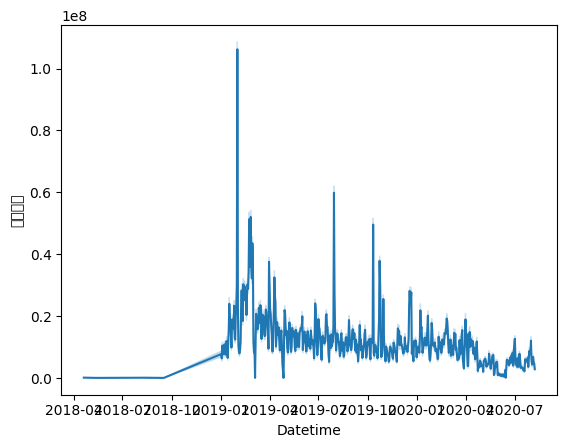

In [203]:
sns.lineplot(data=df1, x='Datetime', y='구매금액', estimator=sum)

In [204]:
p1 = pd.pivot_table(data=df1, index='Datetime', values='구매금액', aggfunc='sum').reset_index()

<Axes: xlabel='Datetime', ylabel='구매금액'>

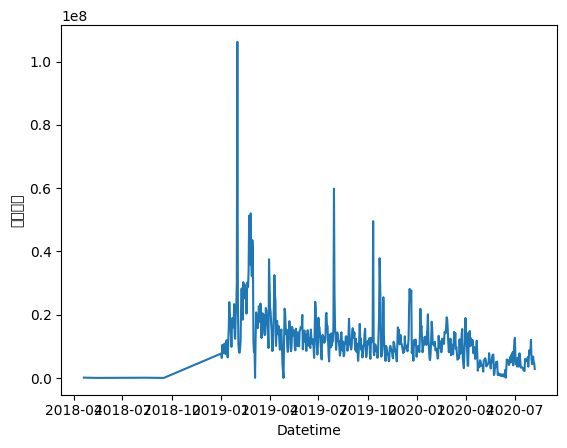

In [205]:
sns.lineplot(data=p1, x='Datetime', y='구매금액')

In [206]:
p2 = pd.pivot_table(data=df1, index=['Datetime', '물품대분류'],
                    values='구매금액',
                    aggfunc='sum').reset_index()

<Axes: xlabel='Datetime', ylabel='구매금액'>

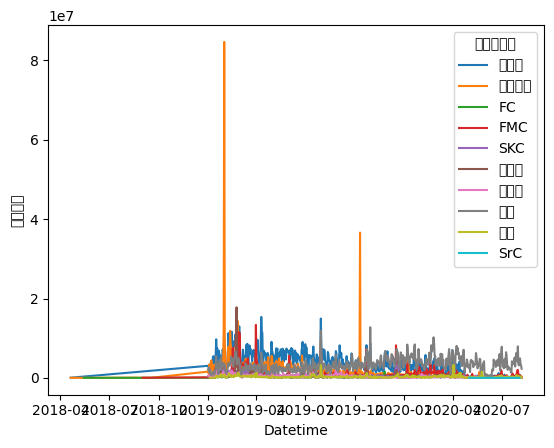

In [207]:
sns.lineplot(data=p2, x='Datetime', y='구매금액', hue='물품대분류')

In [210]:
cond1 = (df1['물품대분류']=='기저귀')
df2 = df1.loc[cond1].iloc[1:]
df2.head()

,구매일,구매금액,물품대분류,Datetime,Year,Month,Week,Day_of_week
29,2019-05-13,59520,기저귀,2019-05-13,2019,5,20,Monday
30,2019-05-10,50640,기저귀,2019-05-10,2019,5,19,Friday
31,2019-06-06,50640,기저귀,2019-06-06,2019,6,23,Thursday
32,2019-07-01,50640,기저귀,2019-07-01,2019,7,27,Monday
33,2019-07-29,101280,기저귀,2019-07-29,2019,7,31,Monday


## ARIMA
- Auto Regressive Integrated Moving Average Model
- AR
- MA
- Difference
<br>

### AR
- Auto Regressive Model: 자기회귀모델
- p 시점 전의 자료가 현재 시점의 데이터에 영향을 주는 자기회귀모델
- ACF: 자기상관함수/ 특정 구간내 데이터간 상관관계
  교회가 늘어나고 범죄율도 늘어나
  그럼 교회가 늘어날수록 범죄율이 늘어난다고 생각할 수도 있는데
  사실 인구가 늘어날 수록 교회가 늘어나는 거였고
  인구가 증가했기 때문에 범죄율이 늘어나는 거였다!
- PACF: 부분자기상관함수/ 다른 거 다 떠나서 둘 간의 관계만 확인한다면
<br>

### MA
- Moving Average Model: 이동평균모델
- 일정한 구간 데이터의 평균을 계산해 미래를 예측하는 모델
<br>

## Difference
- 차분
- stationary한 그래프는 평균과 분산이 일정한 상태를 의미
- non stationary한 데이터는
  - 그래프의 분산은 일정하지만 평균이 상승하는 상태
  - 그래프의 분산도 평균도 불규칙한 상태
  - 그래프가 시계열적으로 골고루 퍼지지 않은 상태
- 정상상태로 바꾸기 위해 differencing(차분)이 필요하다!
- 보통 1~2번 정도 해주고 차분 횟수에 따라 1차차분/ 2차차분으로 불린다
<br>

## 조건
- 단기예측에 적합
- 계절적 변동요인(주기적 변동)
- sample > 50일때만 사용
- 정성적자료(일정한 트렌드가 있을 때)


In [212]:
import statsmodels.tsa.api as tsa

In [213]:
df2.head()

,구매일,구매금액,물품대분류,Datetime,Year,Month,Week,Day_of_week
29,2019-05-13,59520,기저귀,2019-05-13,2019,5,20,Monday
30,2019-05-10,50640,기저귀,2019-05-10,2019,5,19,Friday
31,2019-06-06,50640,기저귀,2019-06-06,2019,6,23,Thursday
32,2019-07-01,50640,기저귀,2019-07-01,2019,7,27,Monday
33,2019-07-29,101280,기저귀,2019-07-29,2019,7,31,Monday


In [215]:
df_time = pd.pivot_table(data=df2, index='Datetime', values='구매금액', aggfunc='sum')
df_time.head()

,구매금액
Datetime,
2019-01-01,3051240
2019-01-02,2556280
2019-01-03,2729480
2019-01-04,2238440
2019-01-05,2478680


In [227]:
y = df_time['구매금액'].resample('1D').mean()

In [233]:
y.isnull().sum()

13


## 시계열 분해
- Trend(추세요인)
- Seasonality(계절요인)
- Cycle/ Residual(불규칙, 순환요인)


In [231]:
# 전날 있었던 가격을 결측치 값으로 넣는 게 낫다
# ffill: forward, bfill: backward(뒤의 일자)
y1 = y.fillna(method='ffill')
y1

Datetime
2019-01-01    3051240.0
2019-01-02    2556280.0
2019-01-03    2729480.0
2019-01-04    2238440.0
2019-01-05    2478680.0
                ...    
2020-08-03     337300.0
2020-08-04     766800.0
2020-08-05     136700.0
2020-08-06     266900.0
2020-08-07      99800.0
Freq: D, Name: 구매금액, Length: 585, dtype: float64

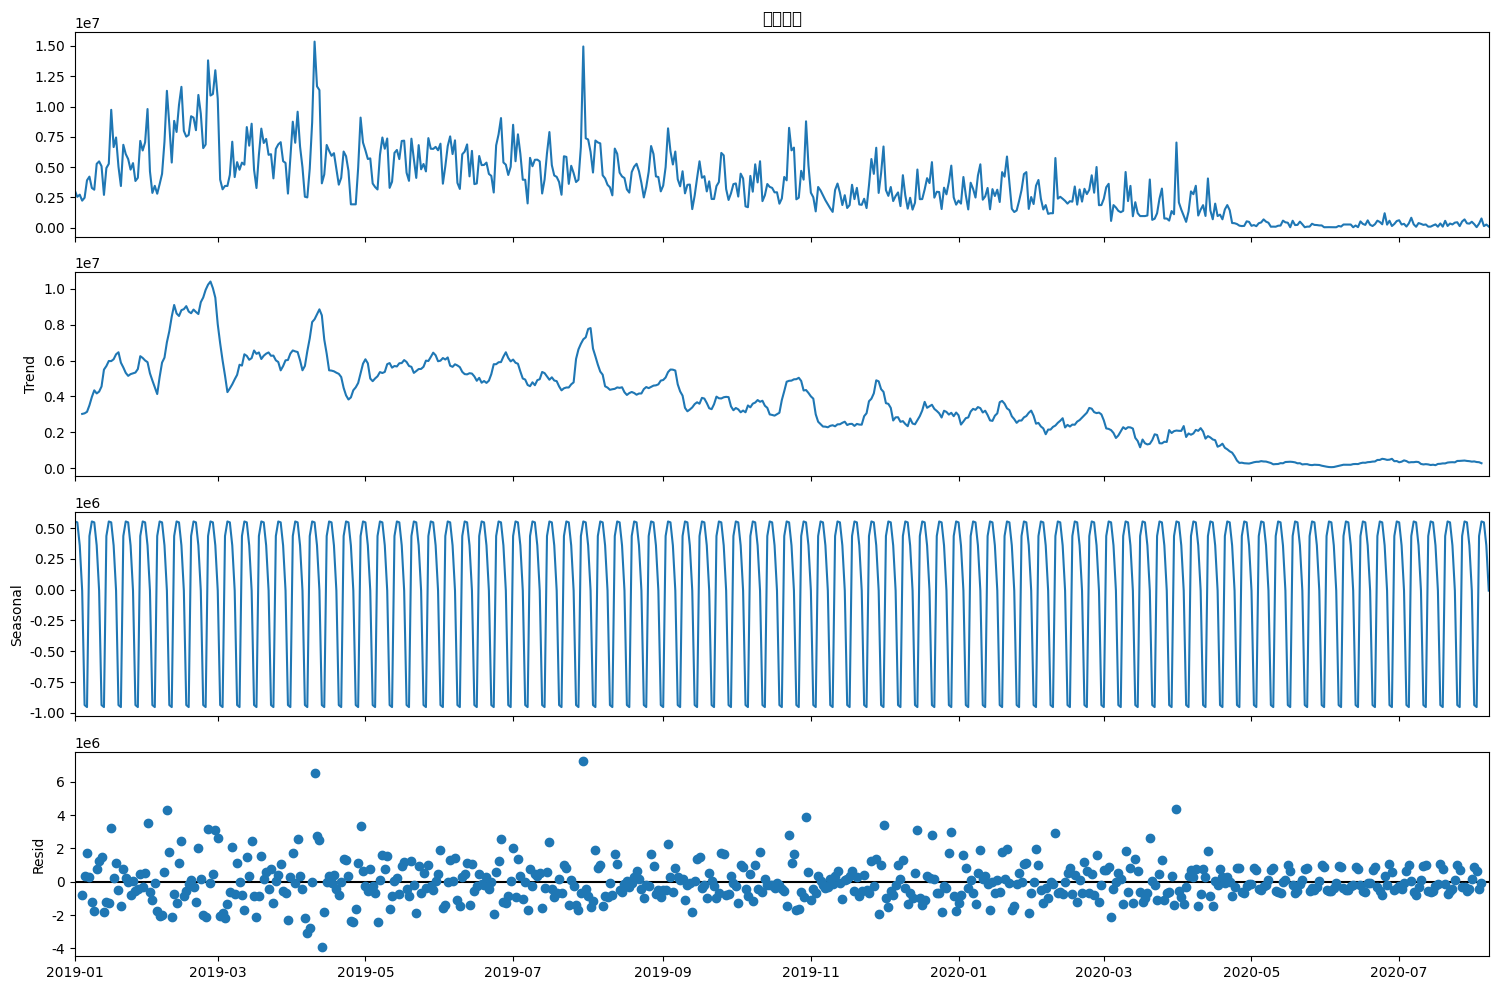

In [234]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 10

# 시계열 모델 생성
model_series = tsa.seasonal_decompose(y1, model='additive')

# 모델 시각화
fig = model_series.plot()
plt.show()

In [235]:
import itertools

In [238]:
# p: 며칠 전의 자료가 오늘 영향을 주는가?
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

seasonal_pdq

[(0, 0, 0, 12),
 (0, 0, 1, 12),
 (0, 1, 0, 12),
 (0, 1, 1, 12),
 (1, 0, 0, 12),
 (1, 0, 1, 12),
 (1, 1, 0, 12),
 (1, 1, 1, 12)]

In [237]:
param_list = []
param_seasonal_list = []
results_AIC_list = []

In [239]:
for param in pdq:
  for param_seasonal in seasonal_pdq:
    try:
      mod = tsa.statespace.SARIMAX(y2, order=param,
                                   seasonal_order = param_seasonal,
                                   enforce_stationarily=False,
                                   enforce_invertibility=False)
      results = mod.fit()
      param_list.append(param)
      param_seasonal_list.append(param_seasonal)
      results.AIC_list.append(results.aic)
    except:
      continue

In [240]:
ARIMA_list = pd.DataFrame({'Parameter': param_list, 'Seasonal': param_seasonal_list, 'AIC':results_AIC_list})
ARIMA_list.to_excel('arima_model_list.xlsx')

In [241]:
ARIMA_list.sort_values(by='AIC').head(2)

,Parameter,Seasonal,AIC


In [ ]:
mod = tsa.statespace.SARIMAX(y2, order=(0, 1, 1), seasonal_order=(0, 1, 1, 12),
                             enforce_stationarity=False, enforce_invertibility=False)
results = mod.fit()
print(results.summary())